# Amazon Reviews Rating Prediction Model (Deep Learning)

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exploratory Data Analysis and Feature Engineering

In [2]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.gz', compression='gzip')

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
df.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           0
sourceURLs                 0
dtype: int64

In [5]:
df.shape[0]

28332

In [6]:
df['reviews.didPurchase'].unique()

array([nan, True, False], dtype=object)

In [7]:
df['reviews.doRecommend'].unique()

array([nan, True, False], dtype=object)

In [8]:
df['reviews.id'].unique()

array([           nan, 2.08530447e+08, 2.08142753e+08, 1.36303197e+08,
       1.77283626e+08, 1.35864424e+08, 1.11624418e+08, 1.87043823e+08,
       1.18703863e+08, 1.84417556e+08, 1.85116510e+08, 1.98609149e+08,
       1.99361088e+08, 1.97771038e+08, 1.77538928e+08, 1.88507767e+08,
       1.85511553e+08, 1.87916576e+08, 1.62984194e+08, 1.96779034e+08,
       1.87836834e+08, 2.01389264e+08, 1.98815979e+08, 1.97149161e+08,
       2.02541414e+08, 1.54108495e+08, 2.01509977e+08, 1.87739239e+08,
       1.88588526e+08, 1.85522650e+08, 1.86535562e+08, 1.97428761e+08,
       1.50064623e+08, 1.89247564e+08, 1.84334422e+08, 1.97972564e+08,
       1.83989783e+08, 1.99086279e+08, 2.02364330e+08, 1.98597442e+08,
       2.00791738e+08, 2.00646961e+08])

In [9]:
df['reviews.numHelpful'].unique()

array([ nan,   1.,   0.,   2.,  40.,  21.,  12., 238.,   6.,   3.,   9.,
        15.,   5., 434.,   8.,   7.,   4.,  16., 621.,  23., 220.,  19.,
        39.,  18.,  72.,  25.,  11.,  27.,  45.,  20.,  10.,  65.,  28.,
        68., 105., 103.,  33.,  48.,  14.,  49.,  13.,  44.,  36., 129.,
        17.,  26., 130.,  35.,  29.,  30.,  22.,  31.,  41.,  93.,  60.,
       292., 345., 525., 288.,  47.,  42.,  55.])

In [10]:
df = df.drop('reviews.didPurchase',axis=1)

In [11]:
df = df.drop('reviews.id',axis=1)

In [12]:
df = df.drop('id',axis=1)

In [13]:
df = df.drop('imageURLs',axis=1)

In [58]:
df = df.drop('sourceURLs',axis=1)

In [15]:
df = df.drop('reviews.title',axis=1)

In [16]:
# Asins are same as names
print(len(df['name'].unique()))
print(len(df['asins'].unique()))

65
65


In [17]:
df = df.drop('asins',axis=1)

In [18]:
df = df.drop('keys',axis=1)

In [19]:
df.head()

,dateAdded,dateUpdated,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.username,sourceURLs
0,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,3,I order 3 of them and one of the item is bad q...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,4,Bulk is always the less expensive way to go fo...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,5,Well they are not Duracell but for the price i...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,5,Seem to work as well as name brand batteries a...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,5,These batteries are very long lasting the pric...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [20]:
df['reviews.date'] = df['reviews.date'].str.split(',').str[0]
df['reviews.dateSeen'] = df['reviews.dateSeen'].str.split(',').str[0]

In [21]:
df['dateAdded'] = pd.to_datetime(df['dateAdded'])
df['dateUpdated'] = pd.to_datetime(df['dateUpdated'])
df['reviews.date'] = pd.to_datetime(df['reviews.date'])
df['reviews.dateSeen'] = pd.to_datetime(df['reviews.dateSeen'])

In [22]:
df['monthAdded'] = df['dateAdded'].apply(lambda date:date.month)
df['yearAdded'] = df['dateAdded'].apply(lambda date:date.year)

In [23]:
df = df.drop('dateAdded',axis=1)

In [24]:
df['monthUpdated'] = df['dateUpdated'].apply(lambda date:date.month)
df['yearUpdated'] = df['dateUpdated'].apply(lambda date:date.year)

In [25]:
df = df.drop('dateUpdated',axis=1)

In [26]:
df['month'] = df['reviews.date'].apply(lambda date:date.month)
df['year'] = df['reviews.date'].apply(lambda date:date.year)

In [27]:
df = df.drop('reviews.date',axis=1)

In [28]:
df['monthSeen'] = df['reviews.dateSeen'].apply(lambda date:date.month)
df['yearSeen'] = df['reviews.dateSeen'].apply(lambda date:date.year)

In [29]:
df = df.drop('reviews.dateSeen',axis=1)

In [30]:
df['reviewLength'] = df['reviews.text'].apply(lambda review:len(review))

In [31]:
df = df.drop('reviews.text',axis=1)

In [32]:
df.head()

,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.username,sourceURLs,monthAdded,yearAdded,monthUpdated,yearUpdated,month,year,monthSeen,yearSeen,reviewLength
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,NaN,NaN,3,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,3,2017,8,2017,139
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,NaN,NaN,4,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,8,2016,8,2017,67
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,NaN,NaN,5,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,12,2016,8,2017,56
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,NaN,NaN,5,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,3,2016,8,2017,67
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,NaN,NaN,5,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,4,2017,8,2017,57


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])

In [35]:
le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])

In [36]:
le = LabelEncoder()
df['categories'] = le.fit_transform(df['categories'])

In [37]:
le = LabelEncoder()
df['primaryCategories'] = le.fit_transform(df['primaryCategories'])

In [38]:
le = LabelEncoder()
df['manufacturer'] = le.fit_transform(df['manufacturer'])

In [39]:
le = LabelEncoder()
df['manufacturerNumber'] = le.fit_transform(df['manufacturerNumber'])

In [40]:
# Treating NAN as a seperate category
le = LabelEncoder()
df['reviews.doRecommend'] = le.fit_transform(df['reviews.doRecommend'])

In [41]:
le = LabelEncoder()
df['reviews.numHelpful'] = le.fit_transform(df['reviews.numHelpful'])

In [42]:
le = LabelEncoder()
df['reviews.username'] = le.fit_transform(df['reviews.username'])

In [43]:
df.head()

,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.username,sourceURLs,monthAdded,yearAdded,monthUpdated,yearUpdated,month,year,monthSeen,yearSeen,reviewLength
0,29,2,1,4,3,55,2,61,3,8417,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,3,2017,8,2017,139
1,29,2,1,4,3,55,2,61,4,5201,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,8,2016,8,2017,67
2,29,2,1,4,3,55,2,61,5,6994,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,12,2016,8,2017,56
3,29,2,1,4,3,55,2,61,5,8769,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,3,2016,8,2017,67
4,29,2,1,4,3,55,2,61,5,8713,"https://www.barcodable.com/upc/841710106442,ht...",10,2015,4,2019,4,2017,8,2017,57


In [44]:
# Low correlation
df.corr()['reviews.rating'].sort_values()

reviewLength          -0.120010
reviews.numHelpful    -0.061476
manufacturer          -0.060569
brand                 -0.059763
manufacturerNumber    -0.058132
monthAdded            -0.052539
monthUpdated          -0.050845
monthSeen             -0.039898
primaryCategories     -0.036668
month                 -0.002281
year                  -0.000451
name                   0.003624
yearSeen               0.029577
reviews.username       0.041562
reviews.doRecommend    0.054526
yearAdded              0.057732
categories             0.060581
reviews.rating         1.000000
yearUpdated                 NaN
Name: reviews.rating, dtype: float64

In [45]:
df = df.drop('yearUpdated',axis=1)

In [46]:
df = df.drop('month',axis=1)
df = df.drop('year',axis=1)
df = df.drop('name',axis=1)
df = df.drop('yearSeen',axis=1)
df = df.drop('primaryCategories',axis=1)
df = df.drop('monthSeen',axis=1)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

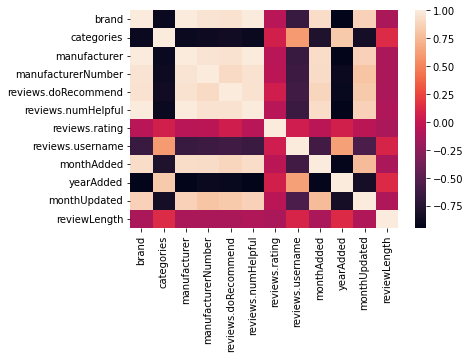

In [48]:
sns.heatmap(df.corr())

## Train Test Split

In [62]:
X = df.drop('reviews.rating',axis=1).values
y = df['reviews.rating'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [66]:
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()

In [67]:
standardScaler.fit(X_train)

StandardScaler()

In [68]:
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [69]:
X_test[0]

array([-0.86801714,  0.91957105, -0.86885348, -0.10999994, -0.75268001,
       -0.87993006,  0.8110086 , -0.34866393,  1.0041713 , -1.30512585,
       -0.27717307])

In [70]:
from tensorflow.keras.utils import to_categorical 

In [71]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [72]:
print(y_train_categorical.shape[1])
print(y_test_categorical.shape[1])

6
6


## Model

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [74]:
X_train.shape

(19832, 11)

In [75]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=11,activation='relu'))

model.add(Dense(units=10,activation='relu'))

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=6,activation='softmax'))

# For a binary classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam')

2022-01-18 00:25:39.908772: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the Model

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [78]:
model.fit(x=X_train, 
          y=y_train_categorical, 
          epochs=600,
          validation_data=(X_test, y_test_categorical), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
620/620 [==============================] - 1s 1ms/step - loss: 0.9898 - val_loss: 0.8655
Epoch 2/600
620/620 [==============================] - 1s 1ms/step - loss: 0.8349 - val_loss: 0.8165
Epoch 3/600
620/620 [==============================] - 1s 1ms/step - loss: 0.8136 - val_loss: 0.8088
Epoch 4/600
620/620 [==============================] - 1s 1ms/step - loss: 0.8083 - val_loss: 0.8036
Epoch 5/600
620/620 [==============================] - 1s 1ms/step - loss: 0.8048 - val_loss: 0.8003
Epoch 6/600
620/620 [==============================] - 1s 1ms/step - loss: 0.8031 - val_loss: 0.7989
Epoch 7/600
620/620 [==============================] - 1s 1ms/step - loss: 0.8017 - val_loss: 0.7981
Epoch 8/600
620/620 [==============================] - 1s 1ms/step - loss: 0.8009 - val_loss: 0.7958
Epoch 9/600
620/620 [==============================] - 1s 1ms/step - loss: 0.7999 - val_loss: 0.7961
Epoch 10/600
620/620 [==============================] - 1s 1ms/step - loss: 0.7990 - val_lo

620/620 [==============================] - 1s 1ms/step - loss: 0.7893 - val_loss: 0.7903
Epoch 82/600
620/620 [==============================] - 1s 1ms/step - loss: 0.7890 - val_loss: 0.7913
Epoch 83/600
620/620 [==============================] - 1s 1ms/step - loss: 0.7890 - val_loss: 0.7898
Epoch 84/600
620/620 [==============================] - 1s 1ms/step - loss: 0.7884 - val_loss: 0.7930
Epoch 85/600
620/620 [==============================] - 1s 1ms/step - loss: 0.7894 - val_loss: 0.7908
Epoch 86/600
620/620 [==============================] - 1s 1ms/step - loss: 0.7887 - val_loss: 0.7935
Epoch 87/600
620/620 [==============================] - 1s 1ms/step - loss: 0.7891 - val_loss: 0.7918
Epoch 00087: early stopping


In [79]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

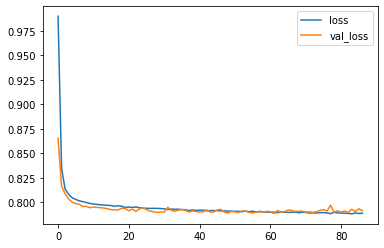

In [80]:
losses.plot()

## Model Evaluation

In [81]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [82]:
predictions = model.predict(X_test)

In [85]:
# Multi-class classification
predictions = np.argmax(predictions, axis=1)

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.33      0.07      0.12       280
           2       0.58      0.04      0.07       198
           3       0.39      0.17      0.24       359
           4       0.43      0.01      0.03      1678
           5       0.72      0.99      0.84      5985

    accuracy                           0.71      8500
   macro avg       0.49      0.26      0.26      8500
weighted avg       0.64      0.71      0.61      8500



In [87]:
print(confusion_matrix(y_test,predictions))

[[  20    4   34    1  221]
 [  22    7   41    0  128]
 [  16    1   61    1  280]
 [   1    0   14   22 1641]
 [   1    0    6   27 5951]]


In [88]:
print(accuracy_score(y_test, predictions))

0.7130588235294117


## Conclusion

Using TensorFlow Keras, the accuracy is similar to just using Machine Learning models with just review length, which has the highest correlation among the features. This is in some way expected as the features used below have low correlation with review rating.

In [90]:
# Low correlation
df.corr()['reviews.rating'].sort_values()

reviewLength          -0.120010
reviews.numHelpful    -0.061476
manufacturer          -0.060569
brand                 -0.059763
manufacturerNumber    -0.058132
monthAdded            -0.052539
monthUpdated          -0.050845
reviews.username       0.041562
reviews.doRecommend    0.054526
yearAdded              0.057732
categories             0.060581
reviews.rating         1.000000
Name: reviews.rating, dtype: float64